In [3]:
import get_db_data as gdd
import analyze_signal as anaz
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
reload(gdd);
reload(anaz);

In [2]:
con=gdd.get_db_data()

In [56]:
ibi_comp_sql = """
SELECT group_id, participant_id, 
	AVG(IF(series_type_id=1, 60/data_value, NULL)) bl_avg_hr,
	AVG(IF(series_type_id=2, 60/data_value, NULL)) interaction_avg_hr,
	AVG(IF(series_type_id=3, 60/data_value, NULL)) ble_avg_hr
    
FROM  interpolated_interval_data
INNER JOIN group_lists using (group_id)
WHERE interpolation_series_id=4
AND list_id = 1
GROUP BY group_id, participant_id"""



In [57]:
df = pd.read_sql(ibi_comp_sql, con.con)
df

,group_id,participant_id,bl_avg_hr,interaction_avg_hr,ble_avg_hr
0,1005,113,79.440060,82.988370,77.688400
1,1005,114,88.973603,89.897501,91.886053
2,1005,115,87.029004,118.595028,89.294081
3,1008,122,84.292949,95.340108,75.923306
4,1008,123,75.264886,79.780461,72.435895
5,1008,124,94.742387,107.250660,90.151139
6,1011,131,69.932723,73.717188,68.121385
7,1011,132,73.752862,74.554088,77.834262
8,1011,133,93.977529,92.272047,84.332753
9,1014,140,73.235147,72.541117,69.199425


In [58]:
gr_ind = {k: v for v, k in enumerate(np.unique(df.group_id))}
gr_ind

{1005: 0,
 1008: 1,
 1011: 2,
 1014: 3,
 1016: 4,
 1022: 5,
 1025: 6,
 1028: 7,
 1031: 8,
 1034: 9,
 1037: 10,
 1040: 11,
 1043: 12,
 1046: 13,
 1049: 14}

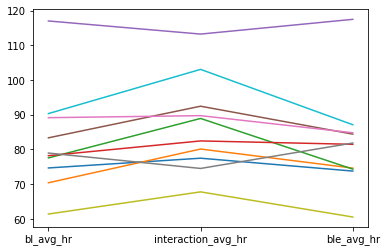

In [59]:
plt.plot(df.iloc[10:20,2:5].T);

In [60]:
df['ia_ratio'] = df.interaction_avg_hr/df.bl_avg_hr


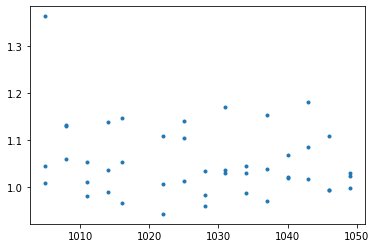

In [61]:
plt.plot(df.group_id, df.ia_ratio,'.')

In [62]:
ratio_df = df.groupby('group_id')['ia_ratio'].agg(['mean','std'])
ratio_df

,mean,std
group_id,,
1005,1.139252,0.194275
1008,1.107692,0.041309
1011,1.015611,0.036365
1014,1.055369,0.075300
1016,1.056203,0.089419
1022,1.019922,0.083488
1025,1.086376,0.065050
1028,0.993402,0.037362
1031,1.079220,0.078303


<ErrorbarContainer object of 3 artists>

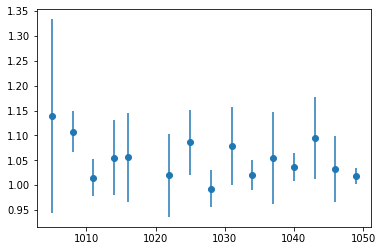

In [63]:
plt.errorbar(x=ratio_df.index,y=ratio_df['mean'], yerr=ratio_df['std'], fmt='o')

In [46]:
par115_signals = [next(con.get_signal_by_series_type_and_interp_type([115],i,4)) for i in [1,2,3]]

In [48]:
par115_signals = [x[1] for x in par115_signals]
par115_signals

[array([[  1.75   ,   0.7463 ],
        [  2.     ,   0.7491 ],
        [  2.25   ,   0.74724],
        ...,
        [304.75   ,   0.71389],
        [305.     ,   0.71575],
        [305.25   ,   0.70312]]),
 array([[  1.75   ,   0.53051],
        [  2.     ,   0.52756],
        [  2.25   ,   0.52183],
        ...,
        [289.     ,   0.49663],
        [289.25   ,   0.50173],
        [289.5    ,   0.50105]]),
 array([[  1.75   ,   0.68539],
        [  2.     ,   0.68304],
        [  2.25   ,   0.67865],
        ...,
        [307.25   ,   0.65915],
        [307.5    ,   0.66767],
        [307.75   ,   0.67086]])]

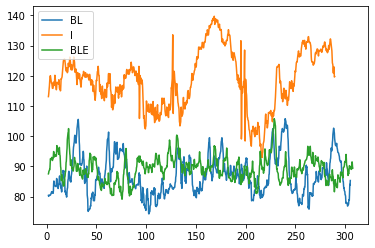

In [55]:
plt.plot(par115_signals[0][:,0],60/par115_signals[0][:,1]);
plt.plot(par115_signals[1][:,0],60/par115_signals[1][:,1]);
plt.plot(par115_signals[2][:,0],60/par115_signals[2][:,1]);
plt.legend(['BL','I','BLE'])

In [76]:
def plot_signals_for_participant(participant_id):
    signals = [next(con.get_signal_by_series_type_and_interp_type([participant_id],i,4)) for i in [1,2,3]]
    signals = [x[1] for x in signals]
    bl_mean = (60/signals[0][:,1]).mean()
    plt.plot(signals[0][:,0],60/(bl_mean*signals[0][:,1]));
    plt.plot(signals[1][:,0],60/(bl_mean*signals[1][:,1]), linewidth=2);
    plt.plot(signals[2][:,0],60/(bl_mean*signals[2][:,1]));
    plt.legend(['BL','I','BLE'])    
    return signals

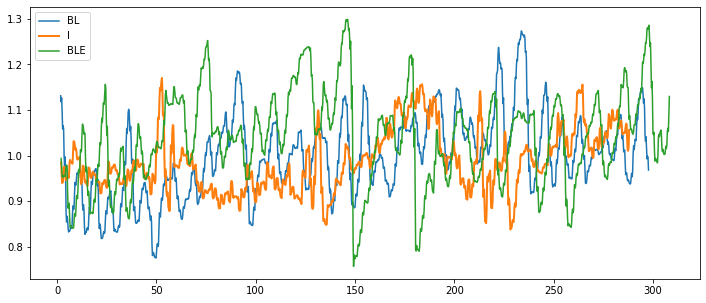

In [77]:
plt.figure(figsize=(12,5))
plot_signals_for_participant(204);

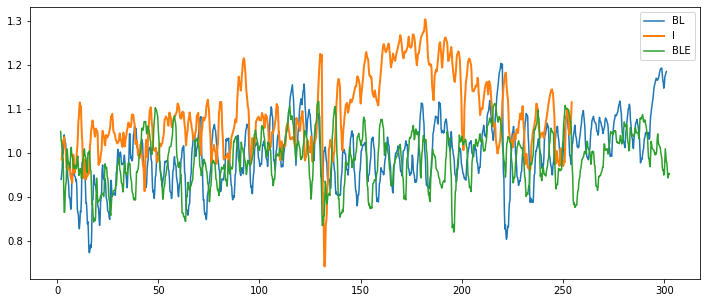

In [80]:
plt.figure(figsize=(12,5))
plot_signals_for_participant(232);

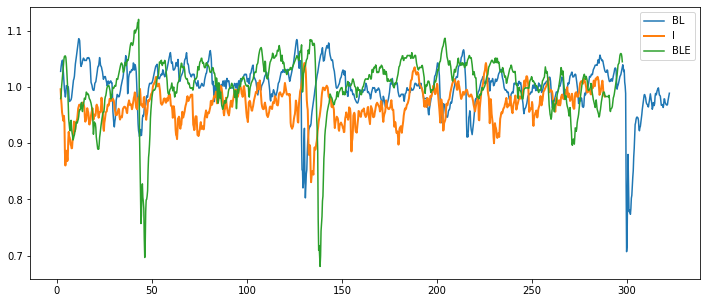

In [78]:
plt.figure(figsize=(12,5))
plot_signals_for_participant(148);

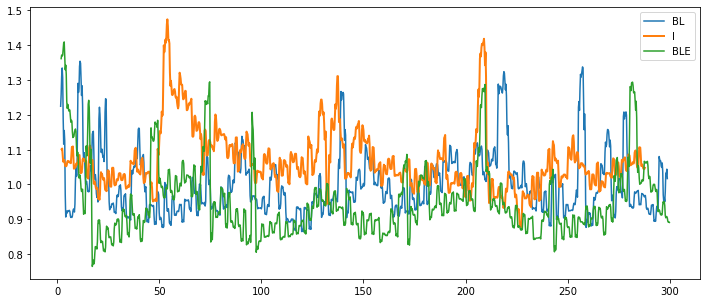

In [79]:
plt.figure(figsize=(12,5))
plot_signals_for_participant(223);

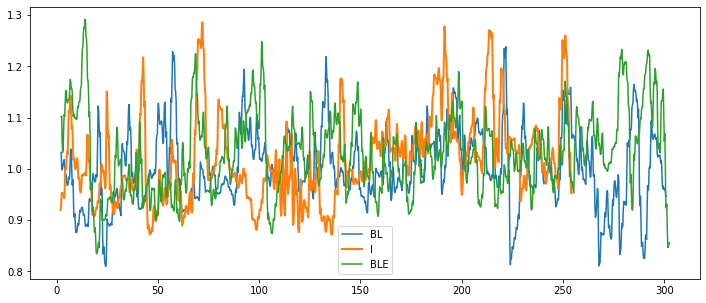

In [81]:
plt.figure(figsize=(12,5))
plot_signals_for_participant(230);

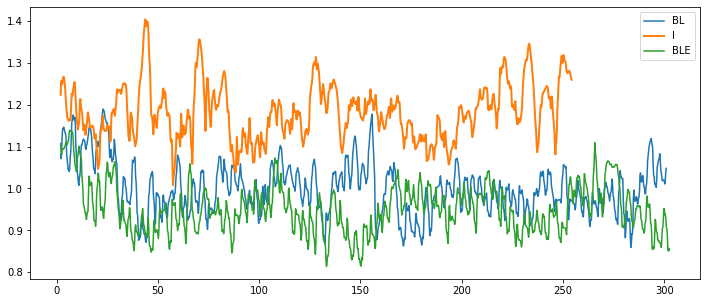

In [82]:
plt.figure(figsize=(12,5))
plot_signals_for_participant(231);